/home/zhmeng/tmp/ipykernel_529476/3954511473.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  preprocess_df.iloc[1:, 1:] = preprocess_df.iloc[1:, 1:].replace("ms", "", regex=True).astype(float)


[113000. 115000. 112000. 124000. 137000. 144000. 167000.]
24    113481.0
25    115500.0
26    112699.0
27    125426.0
28    138534.0
29    145837.0
30    169665.0
Name: 1, dtype: object
[ 145000.  237000.  429000.  871000. 1623000. 3331000. 6426000.]
[ 1095000.  1466000.  2743000.  3814000.  5717000.  9981000. 17274000.]
[6.840400e+07 1.395310e+08 2.776270e+08 5.525520e+08 1.106124e+09
 2.221256e+09 4.436316e+09]
[2.23300e+06 4.36200e+06 8.64400e+06 2.17610e+07 3.76730e+07 7.92350e+07
 1.45077e+08]
[nan nan nan nan nan nan nan]


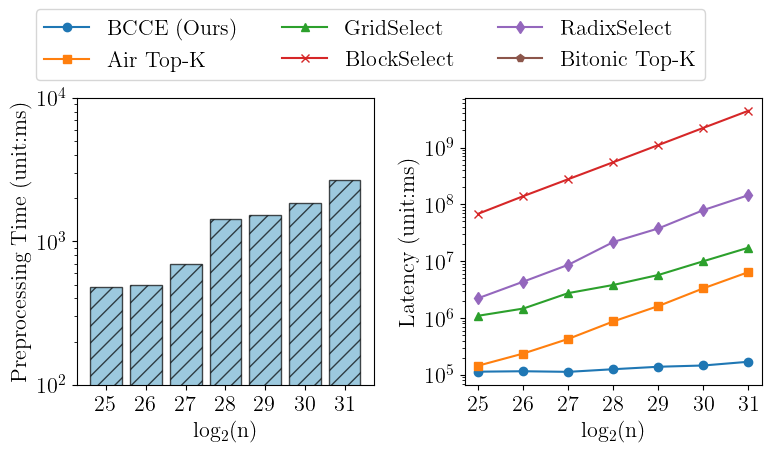

In [7]:
import pandas as pd
from matplotlib import rcParams
from matplotlib.ticker import FuncFormatter
import numpy as np
import matplotlib.pyplot as plt

def convert_to_float(value):
    return float(value.replace("ms", "")) if isinstance(value, str) else value

file_path = '../../output/5_5/5_5_preprocess.xlsx'
preprocess_df = pd.read_excel(file_path, sheet_name='Results')

rcParams["font.size"] = 16
rcParams["font.family"] = "Times New Roman"
rcParams["text.usetex"] = True
rcParams["font.family"] = "serif"

preprocess_df.iloc[1:, 1:] = preprocess_df.iloc[1:, 1:].replace("ms", "", regex=True).astype(float)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# figure 1
x_labels = np.arange(4, 11).astype(str)  # 生成 4 到 10 的横坐标
methods = ["preprocess_v1"]
bar_width = 0.8
ax = axs[0]
x = np.arange(len(x_labels))

for i, method in enumerate(methods):
    bars = ax.bar(x + i * bar_width, preprocess_df.iloc[i + 1, 5:12], width=bar_width, color="#72b3d0",  hatch="//", edgecolor="black", alpha=0.7)

ax.set_yscale("log")
ax.set_ylim(10**2, 10**4)
ax.set_xlabel('log$_2$(n)')
ax.set_ylabel("Preprocessing Time (unit:ms)")
ax.set_xticks(x + (len(methods) - 1) * bar_width / 2)
ax.set_xticklabels([int(x) + 21 for x in x_labels])  # 先转换为 int，再进行 +1 操作


# figure 2
ax = axs[1]
xls = "../../output/5_5/5_5_results.xlsx" 
df = pd.read_excel(xls, sheet_name="Results")
df.set_index("Method", inplace=True)
query_scales = df.columns[0:].astype(str)
methods = ["BCCE (Ours)", "Air Top-K", "GridSelect", "BlockSelect", "RadixSelect", "Bitonic Top-K"]
markers = ["o", "s", "^", "x", "d", "p"]
k = 10
query_num = 1000000

for method_idx, method_name in enumerate(df.index):
    method_uniform_data = df.iloc[method_idx, 0:].apply(convert_to_float).values
    method_uniform_data = method_uniform_data * 1000000
    if method_idx == 0 : 
        print(method_uniform_data)
        method_uniform_data = method_uniform_data + preprocess_df.iloc[1, 5:12]
    print(method_uniform_data)
    ax.plot(query_scales, method_uniform_data, label=methods[method_idx], marker=markers[method_idx])

ax.set_ylabel("Latency (unit:ms)")
ax.set_xticks(query_scales)  # 设置 x 轴刻度
ax.set_xlabel('log$_2$(n)')
ax.set_xticklabels([int(x) + 1 for x in query_scales])
ax.tick_params(axis="x", labelsize=16)  # 调整 x 轴刻度字体大小
ax.set_yscale("log")
ax.grid(False)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=3, bbox_to_anchor=(0.113, 1.07, 0.8, 0.1))

plt.tight_layout()  # 自动调整布局
plt.savefig("5_5.pdf", bbox_inches="tight")
plt.show()